# Большое практическое задание 2
# Классификация заемщиков линейными моделями

## курс "Машинное обучение 1", программа AIMasters, 2022

## Студент: Хоружев Илья Максимович

In [ ]:
import os

from IPython.display import clear_output
from google.colab import drive

drive.mount('/content/drive/')
clear_output()

WORKDIR = '/content/drive/MyDrive/Colab Notebooks'  # your working dir in Google Drive
NB_NAME = 'Khoryzhev_Ilya_exp_linear'                        # your notebook name

!jupyter nbconvert --to html "{WORKDIR}/{NB_NAME}.ipynb" \
                   --output  "{WORKDIR}/{NB_NAME}.html"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Khoryzhev_Ilya_exp_linear.ipynb to html
[NbConvertApp] Writing 1968976 bytes to /content/drive/MyDrive/Colab Notebooks/Khoryzhev_Ilya_exp_linear.html


## Формулировка задания
Данное задание направлено на ознакомление с линейными моделями и градиентными методами обучения. В
задании необходимо: <br>
1. Написать на языке Python собственную реализацию линейного классификатора с произвольной функцией потерь и реализацию функции и градиента функции потерь для логистической регрессии. Реализации можно частично проверить через юнит-тесты и с помощью системы ejudge в соответствующем соревновании. <br><br> **Внимание.** Прохождение всех тестов в соревновании не гарантирует правильность решения. 


2. Вывести все необходимые формулы, привести выкладки в отчёте. 


3. Провести описанные ниже эксперименты с модельными данными и приложенным датасетом в данном ноутбуке. Подготовить отчёт о проделанной работе. Удалите черновые выводы, оставьте только тот код, который является ответом к пунктам задания. Сохраните ноутбук в форматах .ipynb и .html одновременно. <br><br> **Замечание.** Чтобы экспорировать jupyter notebook в .html нужно выбрать: `File -> Download as -> HTML (.html)`. Для экспорта notebook в .html в Google Colab, воспользуйтесь [следующим кодом](https://gist.github.com/vbugaevskii/b9c6181f2ad83e11f5b9c92d315cb2de). Большая просьба: подписывайте свой отчет (в названии файла и внутри ноутбука).


4. В систему проверки необходимо сдать отчёт в обоих форматах и .zip архив с написанными модулями. <br><br> Большая просьба: jupyter notebook и html файл не запаковывать в архив, а сдавать отдельно.


### Некоторые полезные советы
1. Для того, чтобы не перезагружать jupyter notebook каждый раз после того, как вы внесли изменения в модуль knn, можно добавить ячейку с таким содержимым:
```python
%load_ext autoreload
%autoreload 2
```


2. Не нужно копировать свой код из модулей в jupyter notebook, пользуйтесь им, как если бы это была библиотека. Для этого поместите директорию `modules` рядом с notebook-ом. Пример, как может выглядеть содержимое вашей рабочей директории:
```text
tree
    ---modules
    ------__init__.py
    ------linear_model.py
    ------losses.py
    ------utils.py
    ------tests.py
    HW2_*.ipynb
```

## Теоретическая часть (1 балл)
Выведите формулу градиента функции потерь (по параметру $w$) для задачи бинарной логистической регрессии. <br>
Считайте для удобства, что $x[0] = 1$ для любого объекта, то есть $w[0] - \texttt{bias}$. <br>
Так, в выведенном вами градиенте, $\texttt{grad}[1:]$ - градиент по весам, $\texttt{grad}[0]$ - градиент по $\texttt{bias}$.

$$L(a(x), y) = \log(1 + \exp(-y\langle w, x\rangle)), \quad y \in \{-1, 1\}$$

Запишите вывод градиента ниже.

$$\frac{\partial L}{∂w} = \frac{-y\cdot x\cdot \exp(-y\langle w, x\rangle)}{1 + \exp(-y\langle w, x\rangle)} = y\cdot x\cdot\frac{- \exp(-y\langle w, x\rangle)}{1 + \exp(-y\langle w, x\rangle)} = y\cdot x\cdot(\frac{1}{1 + \exp(-y\langle w, x\rangle)} - 1)$$

$$\frac{\partial L}{∂w_0} = \frac{-y\cdot \exp(-y\langle w, x\rangle)}{1 + \exp(-y\langle w, x\rangle)} = y\cdot\frac{- \exp(-y\langle w, x\rangle)}{1 + \exp(-y\langle w, x\rangle)} = y\cdot(\frac{1}{1 + \exp(-y\langle w, x\rangle)} - 1)$$

## Реализация алгоритмов (9 баллов)
Прототипы функций должны строго соответствовать прототипам, описанным в спецификации и проходить все
тесты. Задание, не проходящее все тесты, приравнивается к невыполненному. 


При написании необходимо пользоваться стандартными средствами языка Python, библиотеками `numpy, scipy и matplotlib`. Библиотекой `scikit-learn` для реализаций пользоваться запрещается, но разрешается использовать её в процессе экспериментов. Все
подробности реализации алгоритмов подробно описаны в спецификации к заданию.


Ожидается, что реализациия всех классов и функций будет максимально эффективной. Дополнительно вам предоставлены открытые тесты, которые находятся в модуле `modules`. Чтобы запустить тесты в консоли требуется выполнить команду:
```c
$ pytest ./modules/tests.py

```

Разрешается дополнять файл тестами для самопроверки. Доп баллы за написание своих тестов не будет :)

## Эксперименты (15 баллов)

Эксперименты будем проводить на [датасете](https://www.kaggle.com/competitions/home-credit-default-risk/overview) по классификации заемщиков на плохих (target = 1: клиент с "payment difficulties") и хороших (target = 0: все остальные). Для экспериментов будем использовать лишь основной файл `application_train.csv`, а также перекодируем таргет в метки -1, 1.

Описание колонок находится в файле `description.csv`.

Для начала мы за вас считаем данные и поделим на обучение, валидацию и тест случайным образом.

In [ ]:
import numpy as np, pandas as pd

%load_ext autoreload
%autoreload 2

# %load_ext - https://ipython.readthedocs.io/en/stable/interactive/magics.html
# %autoreload - https://ipython.org/ipython-doc/3/config/extensions/autoreload.html

data = pd.read_csv('drive/MyDrive/application_train.csv')
data.columns = ['_'.join([word.lower() for word in col_name.split(' ') if word != '-']) for col_name in data.columns]

data.target = data.target.map({0: -1, 1: 1})

from IPython.display import display

print('\ntarget value_counts:')
display(data['target'].value_counts(dropna=False))

pd.options.display.max_columns = 100
pd.options.display.max_rows = 150

data.head(3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

target value_counts:


-1    282686
 1     24825
Name: target, dtype: int64

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,...,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,-1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,-1,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import dill
import optuna
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Неожиданная заметка**

С этого момента предлагается некоторым образом отмечать все "неоднозначные" моменты, которые диктует вам домашка. Пример комментирования таких мест в коде - ниже. Если такие места находятся в текстовой ячейке, нужно после нее создать ячейку и прокомментировать желаемые места. Пример:

In [ ]:
#*! что такое "неоднозначные" моменты?
#*! "Если такие места находятся в текстовой ячейке..." - не раскрыт случай нахождения таких мест "между строк"

Под "неоднозначными" понимается нечто, что навязывается вам домашкой, но не является по вашему мнению оптимальным / единственно правильным способом сделать / делать то или иное с точки зрения логики.

К таким моментам НЕ относятся, например: <br>
разные способы фиксация сида, способы выбрать рандомные индексы без повторений, в общем все, что "в разных случаях" делает "примерно одно и то же" и работает "примерно одинаково".

Точное количество таких моментов в домашке не определено. Вы сами решаете, что комментировать.

За проявление внимательности можно будет получить бонусные баллы за работу! <br>
За проявление вопиющей невнимательности можно будет потерять баллы за работу!

In [ ]:
np.random.seed(911)

test_size = int(0.2 * data.shape[0]) #*! почему 0.2?
val_size = int(0.3 * (data.shape[0] - test_size)) #*! почему 0.3?
test_idx = np.random.choice(data.shape[0], size=test_size, replace=False)

val_idx_candidates = np.setdiff1d(np.arange(data.shape[0]), test_idx)
val_idx = np.random.choice(val_idx_candidates, size=val_size, replace=False)

data_dict = dict()
data_dict['tst'] = data.loc[test_idx].reset_index(drop=True)
data_dict['val'] = data.loc[val_idx].reset_index(drop=True)

not_train_idx = np.union1d(test_idx, val_idx)
data_dict['tr'] = data.drop(index=not_train_idx)
data_dict['tr'].reset_index(drop=True, inplace=True)

for key, df in data_dict.items():
    print(key, 'shape:', df.shape)

tst shape: (61502, 122)
val shape: (73802, 122)
tr shape: (172207, 122)


In [ ]:
data_dict['tr']

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,amt_goods_price,name_type_suite,name_income_type,name_education_type,name_family_status,name_housing_type,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_emp_phone,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,occupation_type,cnt_fam_members,region_rating_client,region_rating_client_w_city,weekday_appr_process_start,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,organization_type,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,...,apartments_medi,basementarea_medi,years_beginexpluatation_medi,years_build_medi,commonarea_medi,elevators_medi,entrances_medi,floorsmax_medi,floorsmin_medi,landarea_medi,livingapartments_medi,livingarea_medi,nonlivingapartments_medi,nonlivingarea_medi,fondkapremont_mode,housetype_mode,totalarea_mode,wallsmaterial_mode,emergencystate_mode,obs_30_cnt_social_circle,def_30_cnt_social_circle,obs_60_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,flag_document_7,flag_document_8,flag_document_9,flag_document_10,flag_document_11,flag_document_12,flag_document_13,flag_document_14,flag_document_15,flag_document_16,flag_document_17,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,-1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100006,-1,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,100008,-1,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,NaN,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
4,100009,-1,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Marrie

### Часть первая. Погружаемся в "зону адекватности" гиперпараметров (5 баллов)

Будем считать, для начала, что мы провели какую-то предобработку данных, и теперь мы готовы обучать на них нашу модель. Гиперпараметрами, которые хочется подобрать, являются `step_alpha`, `step_beta`, `batch_size`, `l2_coef`. Будем двигаться к тому, чтобы поизучать, как связаны между собой первые три. Для этого нужно зафиксировать коэффициент l2-регуляризации лосса на каком-нибудь адекватном значении. Будем использовать `optuna`, чтобы его выяснить (см. соответствующий семинар).

Напишите ниже свою `objective_function`, которую в дальнейшем будем оптимизировать. Перебираемые гиперпараметры даны выше; подумайте, как лучше задать их распределения. Положите `tolerance = 1e-4, max_iter = 30, random_seed = 911`. 

  В качестве меры качества предлагается использовать ваш реализованный `BinaryLogisticLoss` на валидации без учета слагаемого, отвечающего за регуляризацию.

  **Совет:** не включайте значения `batch_size` сильно меньше 300, это приведет к долгому времени одной эпохи.

In [ ]:
!pip install --upgrade -q optuna

     |████████████████████████████████| 348 kB 39.7 MB/s 
     |████████████████████████████████| 81 kB 11.3 MB/s 
     |████████████████████████████████| 209 kB 66.0 MB/s 
     |████████████████████████████████| 78 kB 8.6 MB/s 
     |████████████████████████████████| 50 kB 7.8 MB/s 
     |████████████████████████████████| 147 kB 73.2 MB/s 
     |████████████████████████████████| 112 kB 54.2 MB/s 


In [ ]:
import optuna

In [ ]:
from linear_model import LinearModel
from losses import BinaryLogisticLoss

def objective(trial, X_tr, y_tr, X_val, y_val):
    batch_size = trial.suggest_int('batch_size', 200, 9700, step=500)
    step_a = trial.suggest_float('a', 0.01, 1000, log=True)
    step_b = trial.suggest_float('b', 0.5, 4, log=True)
    lamda = trial.suggest_float('lambda', 0.0001, 100, log=True)
    
    loss_function = BinaryLogisticLoss(l2_coef=lamda)
    model = LinearModel(loss_function=loss_function,
                        batch_size=batch_size,
                        step_alpha=step_a,
                        step_beta=step_b,
                        tolerance=1e-4,
                        max_iter=30,
                        random_seed=911
                        )
    
    model.fit(X_tr, y_tr)
    loss_function = BinaryLogisticLoss(l2_coef=0)
    score = loss_function.func(X_val, y_val, model.w)
    return score

Напишите функцию `start_optimization`, запускающую сессию оптимизации, используя входные параметры для предобработки данных:

В ней создайте объект сессии оптимизации - `study` с sampler=sampler. Подготовьте ваш `objective_func` и данные (в качестве фичей по умолчанию будем использовать все числовые признаки, а обрабатывать данные по умолчанию будем минимальным простым пайплайном, приведенным ниже).

Функция должна возвращать `study`.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from functools import partial

    
def start_optimization(
    objective_func, # принимает trial, X_tr, y_tr, X_val, y_val, **other_objective_kwargs
    n_trials,
    n_jobs,
    data_dict,
    study_direction=None,
    study_directions=None,
    sampler=None,
    prep=None,
    features=None,
    **other_objective_kwargs
):
    if prep is None:
        prep = make_pipeline(
            StandardScaler(),
            SimpleImputer(strategy='median')
        )
    
    if features is None:
        features = data.select_dtypes(np.number).drop(columns=['target', 'sk_id_curr']).columns

    y_train = data_dict['tr']['target']
    X_train = prep.fit_transform(data_dict['tr'][features], y_train)
    X_val = prep.transform(data_dict['val'][features])
    y_val = data_dict['val']['target']

    study = optuna.create_study(
        direction=study_direction,
        sampler=sampler
        )

    objective_with_args = partial(objective_func, X_tr=X_train, X_val=X_val, y_tr=y_train, y_val=y_val)
    study.optimize(func=objective_with_args, n_trials=n_trials, n_jobs=n_jobs)
    
    return study

Запустите процесс оптимизации с `TPESampler`, предварительно настроив, как минимум, `n_startup_trials`; подумайте, какое `n_trials` выбрать.

In [ ]:
tpe_sampler = optuna.samplers.TPESampler(n_startup_trials=20, n_ei_candidates=10)
study_4 = start_optimization(objective, 150, 2, data_dict, 'minimize', sampler=tpe_sampler)

Визуализируйте результаты оптимизации с помощью `optuna.visualization.plot_slice`. 

In [ ]:
from optuna.visualization import plot_slice
plot_slice(study_4, target=clipper_example, target_name='loss')

Опишите свои наблюдения. Если наблюдать вам мешает кривой масштаб графиков из-за слишком высоких значений лосса для некоторых trials, можно "зазумиться" в нужный интервал, выделяя на графике нужное подмножество точек или использовать аргумент `target`.

Для коэффициента регуляризации trials сошлись к минмиальному значению - 0.0001.

Для batch size алгортим предпочитает брать мелкие бачи 200, 700

Для коеффициента альфа наблюдается наиболее разрознеанная картина: можно выбрать из 1 - 15

Для коэффициента бета алгоритм сошелся к значениям 2.7 - 3

**Ответьте на вопросы:**

1) Почему не нужно включать слагаемое, отвечающее за регуляризацию, в подсчет лосса для подбора гиперпараметров?

***Ответ:***

Потому что оно мешает оценить качество для полученных гипперпараметров, поскольку на валидационной выборке мы не обучались, но штрафуем за сложность на ней.

2) Почему, если нашей целью является подбор адекватного коэффициента l2-регуляризации, мы включали в перебор остальные гиперпараметры?

***Ответ:***

Потому что данные гипперпараметры зависимы друг от друга. То есть если бы не включали их в перебор, то найденное адекватное значение l2-регуляризации не обязательно бы было оптимальным.

Давайте теперь посмотрим на то, что у нас получилось. Предлагается не сразу брать лучший по скору оптимизации trial, а сделать вывод, используя дополнительные данные.

  Используя график `plot_slice` выше и `study.trials`, выберите 3 лучших на ваш взгляд trial-кандидата для дальнейшего изучения.<br> Объясните ваш выбор. Если нужно, визуализируйте адекватным и наглядным образом вашу логику, чтобы проверяющий мог без труда в ней убедиться. 

***Ответ:***

Следующие показатели я выбрал среди всех trials. Они обладают loss близким к минимальному (145 trial). Эти 3 trials отличаются по  коэффициенту альфа и 134 trial чуть отличается от остальных по бета, что примерно соответсвует всему разнообразию изображенному на plot_slice

In [ ]:
print(study_4.trials[109].values)
study_4.trials[109].params


[0.25237675194716047]


{'batch_size': 200,
 'a': 17.01072519195003,
 'b': 2.674513344234736,
 'lambda': 0.00022480674387764687}

In [ ]:
print(study_4.trials[134].values)
study_4.trials[134].params

[0.25234123126154206]


{'batch_size': 200,
 'a': 2.3092345648438077,
 'b': 2.942047737796868,
 'lambda': 0.00010085568217173602}

In [ ]:
print(study_4.trials[145].values)
study_4.trials[145].params


[0.2523320223528545]


{'batch_size': 200,
 'a': 3.0415205104914764,
 'b': 2.6841540497030265,
 'lambda': 0.00010731259724220685}

Обучите по модели на каждый trial, собирая историю на обучении и валидации. Положите обученные модели и полученные истории в словари по ключу trial.number.

In [ ]:
prep = make_pipeline(
        StandardScaler(),
        SimpleImputer(strategy='median')
        )

features = data.select_dtypes(np.number).drop(columns=['target', 'sk_id_curr']).columns

y_train = data_dict['tr']['target']
X_train = prep.fit_transform(data_dict['tr'][features], y_train)
X_val = prep.transform(data_dict['val'][features])
y_val = data_dict['val']['target']

top_trials = {}

loss_function = BinaryLogisticLoss(l2_coef=0.0001)
model = LinearModel(loss_function=loss_function, batch_size=200, step_alpha=3, step_beta=2.68, tolerance=1e-5, max_iter=30)
top_trials['trial.1'] = (model.fit(X_train, y_train, trace=True, X_val=X_val, y_val=y_val), model)
model = LinearModel(loss_function=loss_function, batch_size=200, step_alpha=2.3, step_beta=2.95, tolerance=1e-5, max_iter=30)
top_trials['trial.2'] = (model.fit(X_train, y_train, trace=True, X_val=X_val, y_val=y_val), model)
model = LinearModel(loss_function=loss_function, batch_size=200, step_alpha=17, step_beta=2.68, tolerance=1e-5, max_iter=30)
top_trials['trial.3'] = (model.fit(X_train, y_train, trace=True, X_val=X_val, y_val=y_val), model)

Напишите функцию `plot_trial_info`, которая выводит "информацию" о поданном trial. В эту "информацию" обязательно должно входить:
- График `feature - weight`, показывающий `top_k` признаков по модулю веса и их значения весов. Признаки должны идти по убыванию модуля веса.<br>Используйте `ax.barh`. <br> Используйте `ax.bar_label`, чтобы подписать веса к барам.<br> Используйте `ax.set_title(f'l2_coef: {l2_coef:.2e}', fontsize=15)` для этого графика.


- График "время обучения - лосс" - на обучении и валидации. Укажите "количество эпох | batch_size" в качестве title к этому графику. <br> Используйте `ax.plot`.


- Что угодно еще, что поможет вам принять решение о том, почему вы выберете один trial из этих трех.
<br><br>

Настройте размер графиков, шрифт, легенду. Убедитесь, что в вашей "информации" присутствует `trial.number, batch_size`. <br>
Визуализируйте выбранные вами trials. Убедитесь в адекватности графиков.

145  trail:


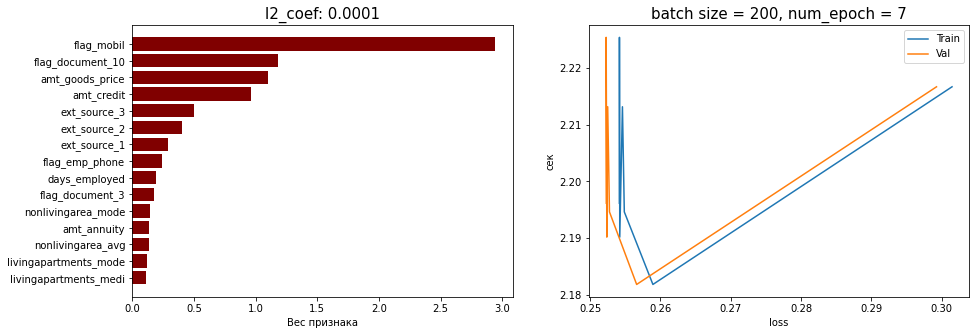




134  trail:


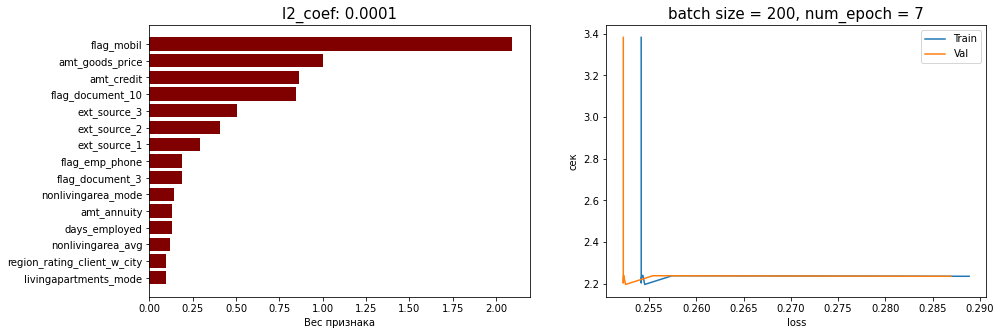




109  trail:


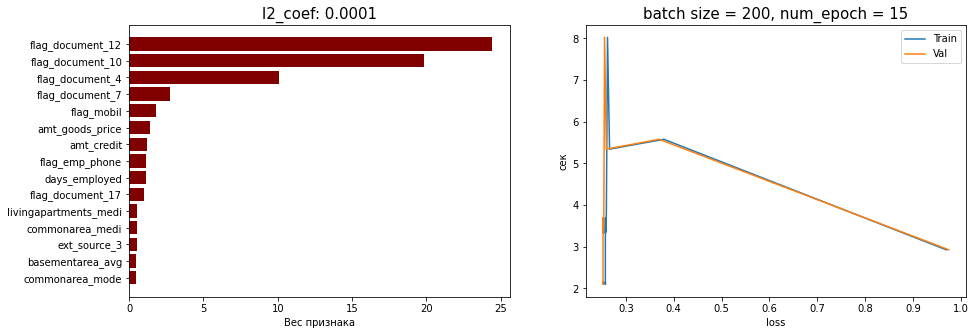

In [ ]:
import matplotlib.pyplot as plt

def plot_trial_info(trial, model, history, k=15, *your_args, **your_kwargs):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    weights = abs(model.get_weights())
    top_k = np.argsort(weights)[-k:]
    weights = np.sort(weights)[-k:]
    plt.barh(features[top_k], weights, color='maroon')
    plt.xlabel('Вес признака')
    plt.title('l2_coef: 0.0001', fontsize=15)

    plt.subplot(122)
    plt.plot(history['func'], history['time'], label='Train')
    plt.plot(history['func_val'], history['time'], label='Val')
    plt.xlabel('loss')
    plt.ylabel('cек')
    plt.legend()
    plt.title('batch size = 200, num_epoch = {}'.format(len(history['time'])), fontsize=15)
    plt.show()

trial_nums = [145, 134, 109]
for i, trial in zip(trial_nums, top_trials):
    print(i , ' trail:')
    plot_trial_info(trial, model=top_trials[trial][1], history=top_trials[trial][0])
    print('\n\n')

Опишите свои наблюдения. Если нужно, подключите визуализацию.

***Ответ:***

График loss от времени считается по каждой эпохе.

Первая модель (145 trial) работает быстрее остальных, при этом не так сильно выделяет некоторые признаки как 3 модель (109 trial). Поэтому в дальнейшем буду использовать ее.

Какой в итоге коэффициент l2-регуляризации будем фиксировать для дальнейших экспериментов? <br>
Ответ объясните :)

***Ответ:***

Все выбранные мной модели имели коэффициент регуляризации 0.0001. Я бы выбрал его, поскольку оптимизатор гипперпараметров сошелся к этому значению.

### Часть вторая. Research (6 баллов)

Давайте зафиксируем выбранный коэффициент регуляризации и проведем несколько экспериментов с `step_alpha, step_beta, batch_size`. Но для начала посмотрим - возможно, нам удастся уменьшить размер признакового пространства без сильной потери качества, чтобы ускорить наши эксперименты.

Достаньте из словаря модель, соответствующую выбранному вами лучшему trial, и нарисуйте график отсортированных модулей ее весов.

<function matplotlib.pyplot.show(*args, **kw)>

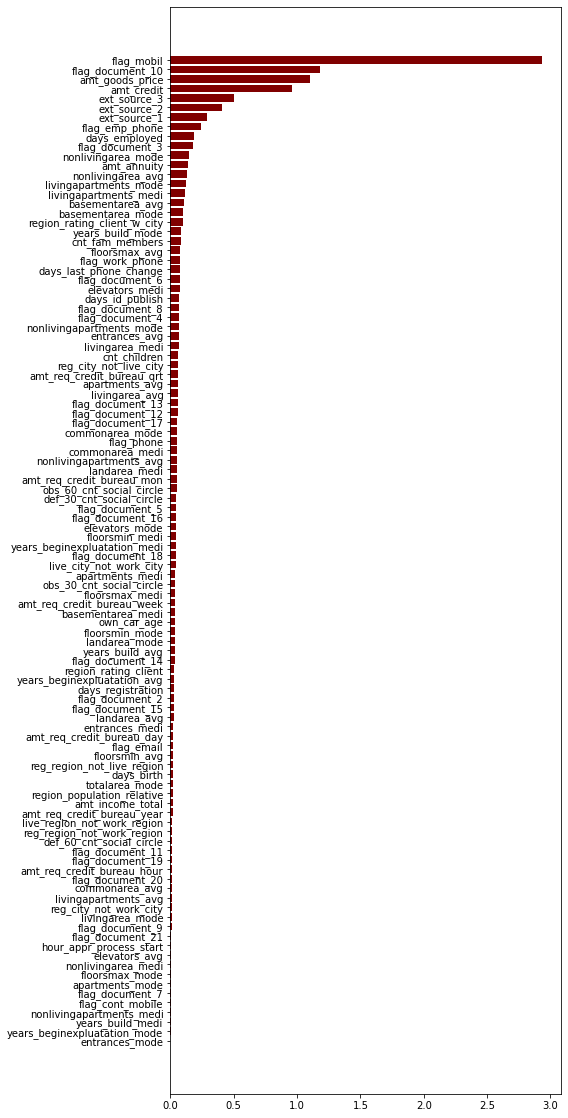

In [ ]:
from matplotlib.cbook import index_of
model = top_trials['trial.1'][1]
weights = abs(model.get_weights())
indices = np.argsort(weights)
weights = np.sort(weights)
plt.figure(figsize=(7,20))

plt.barh(features[indices], weights, color='maroon')
plt.show

Подумайте, можно ли убрать какую-то долю признаков? Если да, то какие признаки вы уберете для дальнейших экспериментов? <br>
Ответ объясните. Могут ли возникнуть какие-то проблемы в дальнейшем?

***Ответ:***

Выкинем 40 признаков. Такое число, поскольку их суммарный вес составляет менее 5% от веса остальных признаков.

Если откинуть слишком много признаков, то можно потерять часть информации, что приведет к худшей работе алгоритма.

In [ ]:
np.sum(weights[:40])/np.sum(weights) * 100

4.793803185306951

In [ ]:
indices_new = indices[40:]
X_val_new = X_val[:, indices_new]
X_train_new = X_train[:, indices_new]

Напишите новую функцию `research_objective` для перебора `step_alpha, step_beta` при фиксированных `l2_coef, batch_size`. Остальные гиперпараметры оставьте без изменений с прошлого раза. Для перебора step_alpha используйте log-шкалу от 1e-3 до 20, для перебора step_beta - log-шкалу от 0.1 до 5.

Для `batch_size = 300, 1000, 10000, None` запустите по сессии оптимизации на выбранном вами (под)множестве признаков, собирая каждый `study` в словарик по ключу batch_size. Используйте `n_trials = 200`, TPESampler с параметром `n_startup_trials = 100`.<br>

In [ ]:
def research_objective(trial, batch_size, X_tr, y_tr, X_val, y_val):

    step_a = trial.suggest_float('a', 0.001, 20, log=True)
    step_b = trial.suggest_float('b', 0.1, 5, log=True)
    
    loss_function = BinaryLogisticLoss(l2_coef=0.0001)
    model = LinearModel(loss_function=loss_function,
                        batch_size=batch_size,
                        step_alpha=step_a,
                        step_beta=step_b,
                        tolerance=1e-4,
                        max_iter=30,
                        random_seed=911
                        )
    model.fit(X_tr, y_tr)

    loss_function = BinaryLogisticLoss(l2_coef=0)
    score = loss_function.func(X_val, y_val, model.w)
    return score

In [ ]:
def start_optimization_research(
    objective_func, batch_size, X_tr, y_tr, X_val, y_val,
    n_trials,
    n_jobs,
    study_direction=None,
    sampler=None,
    **other_objective_kwargs
):
    study = optuna.create_study(direction=study_direction, sampler=sampler)

    objective_with_args = partial(objective_func, batch_size=batch_size ,X_tr=X_tr, X_val=X_val, y_tr=y_tr, y_val=y_val)
    study.optimize(func=objective_with_args, n_trials=n_trials, n_jobs=n_jobs)
    
    return study

In [ ]:
research_study = []
batch_size_list = [300, 1000, 10000, None]

tpe_sampler = optuna.samplers.TPESampler(n_startup_trials=100)
for batch in batch_size_list:
    research_study.append(start_optimization_research(research_objective, batch, X_train_new, y_train, X_val_new, y_val, 
                                      200, 2, 'minimize', sampler=tpe_sampler))

Используя `optuna.visualization.plot_contour`, нарисуйте график зависимости `step_alpha - step_beta - objective`. Используйте аргумент `target`, чтобы обрезать значения лоссов, которые портят тепловую карту. <br>
Для каждого `batch_size` выведите такой график в отдельной ячейке.

In [ ]:
def clipper_example(frozen_trial):
    max_value = 0.255
    return min(frozen_trial.value, max_value)


In [ ]:
optuna.visualization.plot_contour(research_study[0], params=['a', 'b']) # batch_size = 300

In [ ]:
optuna.visualization.plot_contour(research_study[1], params=['a', 'b']) # batch_size = 1000

In [ ]:
optuna.visualization.plot_contour(research_study[2], params=['a', 'b']) # batch_size = 10000

In [ ]:
optuna.visualization.plot_contour(research_study[3], params=['a', 'b']) # batch_size = None

Опишите подробно все свои наблюдения.

**Ответ:**

Легко заметить, что по мере увеличения batc_size - уменьшается оптимальный коэффициент бета. То есть для большего числа эпох для модели с большим batch_size требуется делать шаги, большие чем для модели с меньшим batch_size.

Можно сказать, что засчет коэффициента альфа дополнительно уточняется learning rate для определенных batch_size.

Мы поставили довольно большое значение `n_startup_trials` в TPESampler. Как думаете, для чего?

**Ответ:**

Чтобы протестировать большее множество различных независимыъ комбинаций коэффициентов альфа и бета. Таким образом можно лучше уловить их зависимость. 

Обучите по модели для каждого `batch_size` с лучшими `step_alpha, step_beta`. Соберите историю, сложите все в словари по ключу batch_size.

In [ ]:
top_trials_batch = {}
loss_function = BinaryLogisticLoss(l2_coef=0.0001)
model = LinearModel(loss_function=loss_function, batch_size=300, step_alpha=12.41, step_beta=3.5, tolerance=1e-4, max_iter=30)
top_trials_batch['300'] = (model.fit(X_train, y_train, trace=True, X_val=X_val, y_val=y_val), model)
model = LinearModel(loss_function=loss_function, batch_size=1000, step_alpha=12.92, step_beta=2.5, tolerance=1e-4, max_iter=30)
top_trials_batch['1000'] = (model.fit(X_train, y_train, trace=True, X_val=X_val, y_val=y_val), model)
model = LinearModel(loss_function=loss_function, batch_size=10000, step_alpha=19.96, step_beta=0.9, tolerance=1e-4, max_iter=30)
top_trials_batch['10000'] = (model.fit(X_train, y_train, trace=True, X_val=X_val, y_val=y_val), model)
model = LinearModel(loss_function=loss_function, batch_size=None, step_alpha=7.47, step_beta=0.1, tolerance=1e-4, max_iter=30)
top_trials_batch['None'] = (model.fit(X_train, y_train, trace=True, X_val=X_val, y_val=y_val), model)

Визуализируйте результаты эксперимента. Нарисуйте графики `time-loss`, `epoch-loss`, `epoch-learning_rate` для каждого `batch_size`. <br>
На графике `epoch-loss` должно быть каким-либо образом отображено среднее время эпохи для каждого размера батча. <br>
Под `learning_rate` имеется в виду:
$$\eta_k  = \frac{\alpha}{k^{\beta}}, \quad \text{где $k$ - номер итерации (эпохи)}$$

Убедитесь, что различия между графиками, относящимися к разным `batch_size`, хорошо видны.

In [ ]:
def plot_trial_batch_info(model, history, a, b):
    plt.figure(figsize=(25,5))
    plt.subplot(131)
    plt.plot(np.cumsum(history['time']), history['func_val'])
    plt.ylabel('loss')
    plt.xlabel('sec')
    plt.grid()
    plt.title('time vs loss, num_epoch = {}'.format(len(history['time'])), fontsize=15)

    mean_time = np.mean(history['time'])
    plt.subplot(132)
    plt.plot(np.arange(1, len(history['time']) + 1), history['func_val'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.grid()
    plt.title('epoch vs loss, num_epoch = {}\n mean epoch time: {:.2f} sec'.format(len(history['time']), mean_time), fontsize=15)

    lr = a / (np.arange(1, len(history['time']) + 1) ** b)
    plt.subplot(133)
    plt.plot(np.arange(1, len(history['time']) + 1), lr)
    plt.ylabel('learnin rate')
    plt.xlabel('epoch')
    plt.grid()
    plt.title('epoch vs learning rate, num_epoch = {}'.format(len(history['time'])), fontsize=15)
    plt.show()

batch_size =  300


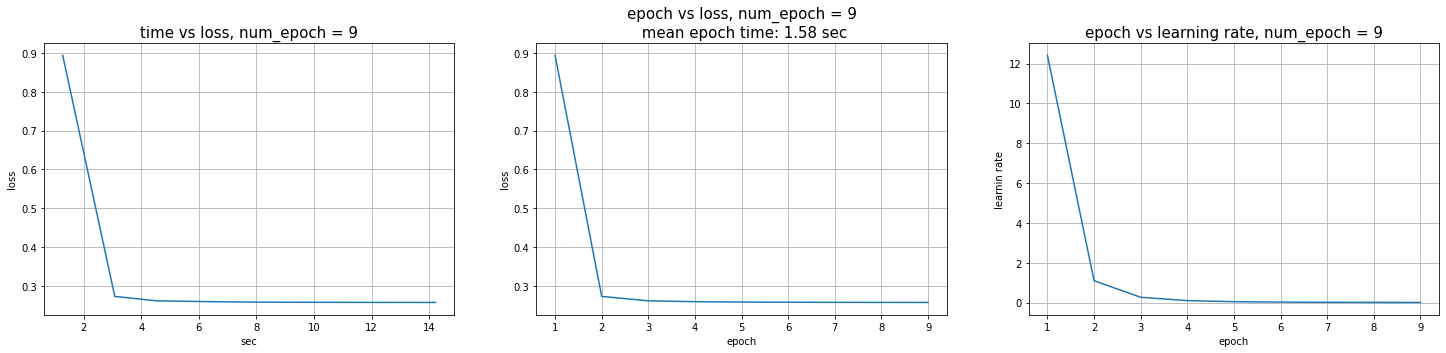




batch_size =  1000


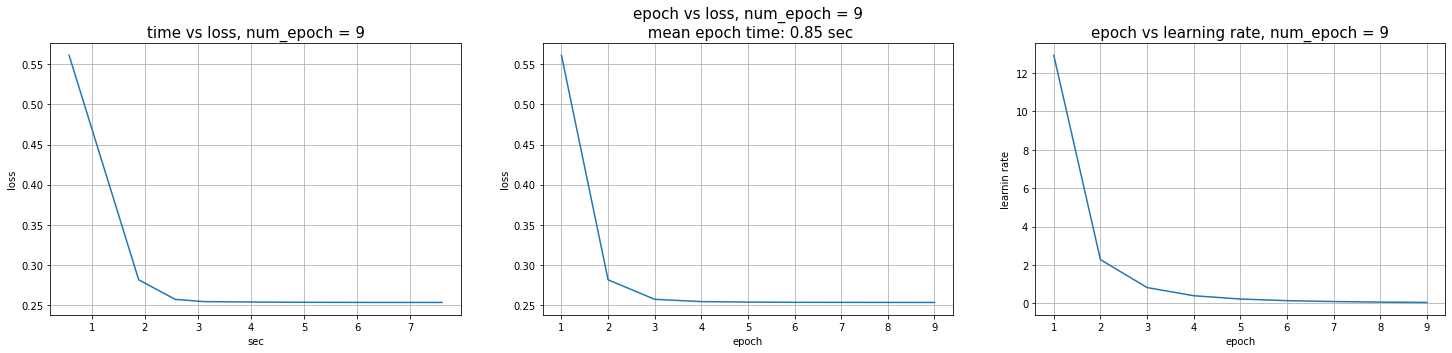




batch_size =  10000


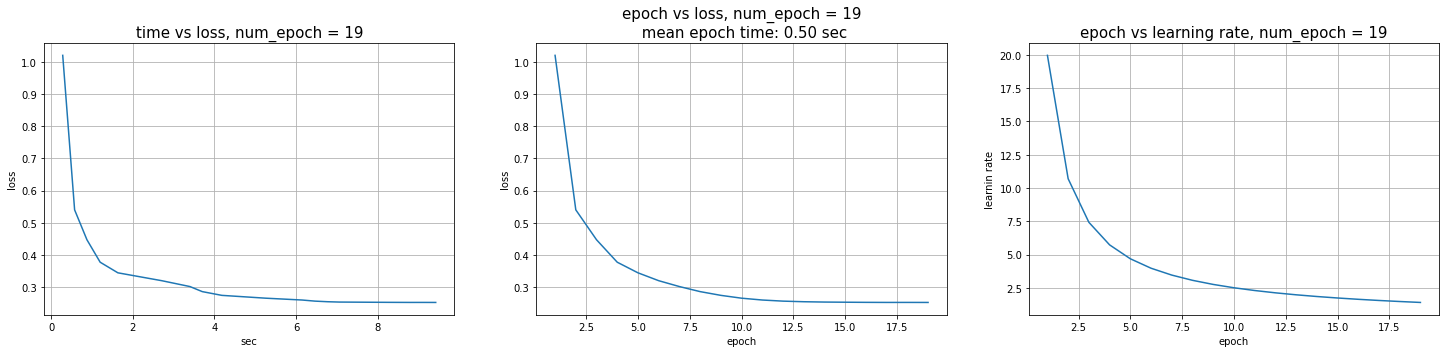




batch_size =  None


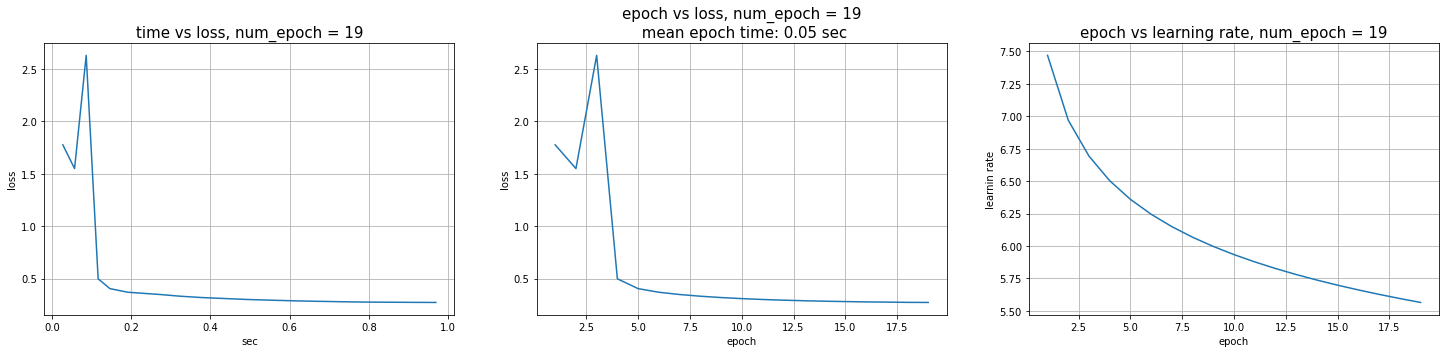

In [ ]:
alpha = [12.41, 12.92, 19.96, 7.47]
beta = [3.5, 2.5, 0.9, 0.1]
for a, b, batch_size, trial in zip(alpha, beta, batch_size_list, top_trials_batch):
    print('batch_size = ', batch_size)
    plot_trial_batch_info(model=top_trials_batch[trial][1], history=top_trials_batch[trial][0], a=a, b=b)
    print('\n\n')

Какие выводы можно сделать из увиденного?

**Ответ:**

В данном случае, в отличие от предыдущего я построил график зависимости суммарного времени за предыдущие эпохи для loss.

Модели с меньшим batch_size сходятся быстрее (по эпохам), однако тренируются заметно дольше. 1.58 > 0.85 > 0.5 > 0.05 в среднем за эпоху секундах.

Значение loss для моделей с меньшим batch_size также быстрее стремится к 0.25

Чем больше batch size, тем более плавно убывает кривая learning rate, что соответствует формуле и полученным оптимальным значениям коэффициентам, при этом для больших значений batch_size она не уходит в 0.

### Часть третья. Метрика (4 балла)

Настало время проверить, во что вылились наши усилия. Посмотрим на метрику `sklearn.metrics.balanced_accuracy_score`.

Выберите по графикам выше оптимальные параметры для вашей финальной модели. Посчитайте для этой модели значение `balanced_accuracy` на обучающей, валидационной и тестовой выборках. Используйте `model.get_optimal_threshold` для подсчета порога бинаризации.

In [ ]:
from sklearn.metrics import balanced_accuracy_score

y_test = data_dict['tst']['target']
X_test = prep.transform(data_dict['tst'][features])
X_test = X_test[:, indices_new]

loss_function = BinaryLogisticLoss(l2_coef=0.0001)
model = LinearModel(loss_function=loss_function, batch_size=1000, step_alpha=12.92, step_beta=2.5, tolerance=1e-4, max_iter=100)
model.fit(X_train_new, y_train)
opt_threshold = model.get_optimal_threshold(X_val_new, y_val)

y_train_pred = model.predict(X_train_new, threshold=opt_threshold)
y_val_pred = model.predict(X_val_new, threshold=opt_threshold)
y_test_pred = model.predict(X_test, threshold=opt_threshold)

print('Train: ', balanced_accuracy_score(y_train, y_train_pred))
print('Val: ', balanced_accuracy_score(y_val, y_val_pred))
print('Test: ', balanced_accuracy_score(y_test, y_test_pred))

Train:  0.6726173032630447
Val:  0.6765775617585982
Test:  0.6720991035255051


Что скажете?

**Ответ:**

Модель не переобучилась. На валидации получилась наибольшая accuracy, но отличается не сильно. Optuna - отличная библиотека.

Чтобы далее улучшить результат прогнозирования - надо более подробно обработать данные.

В качестве послесловия предлагается на обсуждение вопрос, который мог возникнуть еще в самом начале экспериментов: почему мы подбираем гиперпараметры по лоссу, если в результате мы хотим получить модель с лучшим показателем метрики `balanced_accuracy`? Первое, что хочется ответить, так это то, что каждый раз подбирать оптимальный порог и считать метрику дольше, чем просто посчитать лосс.

  Замерьте время подсчета лосса и подбора оптимального порога + подсчет метрики, [используя](https://ipython.readthedocs.io/en/stable/interactive/magics.html) `%timeit` или `%%timeit`.

In [ ]:
%timeit loss_function.func(X_val_new, y_val, model.w)

6.78 ms ± 180 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
opt_threshold = model.get_optimal_threshold(X_val_new, y_val)
y_val_pred = model.predict(X_val_new, threshold=opt_threshold)
balanced_accuracy_score(y_val, y_val_pred)

550 ms ± 160 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Подумайте (и напишите), есть ли другие причины, по которым использовать `balanced_accuracy` в нашем процессе подбора гиперпараметров не стоит?

**Ответ:**

Есть ощущение, что balanced_accuracy и loss будут работать одинаков при подборе гипперпараметров, поэтому логичнее использовать loss.

По логике, уменьшение лосса есть "улучшение качества работы алгоритма", как и увеличение нашей метрики. Может быть, мы имели право перебирать гиперпараметры по лоссу, даже если на самом деле хотели от модели лишь `balanced_accuracy` побольше?

Давайте проверим. Напишите функцию `multiobjective`, которая перебирает `step_alpha, step_beta`. Зафиксируйте все остальное на адекватных значениях, согласно предыдущим экспериментам. Функция должна возвращать tuple `(loss, balanced_acc_score)` - лосс и balanced_accuracy_score с подбором оптимального порога, полученные на валидации.

In [ ]:
def multiobjective(trial, X_tr, y_tr, X_val, y_val):

    step_a = trial.suggest_float('a', 0.001, 20, log=True)
    step_b = trial.suggest_float('b', 0.1, 5, log=True)
    
    loss_function = BinaryLogisticLoss(l2_coef=0.0001)
    model = LinearModel(loss_function=loss_function,
                        batch_size=1000,
                        step_alpha=step_a,
                        step_beta=step_b,
                        tolerance=1e-4,
                        max_iter=30,
                        random_seed=911
                        )
    model.fit(X_tr, y_tr)

    opt_threshold = model.get_optimal_threshold(X_val_new, y_val)
    y_val_pred = model.predict(X_val_new, threshold=opt_threshold)
    score = balanced_accuracy_score(y_val, y_val_pred)
    loss_function = BinaryLogisticLoss(l2_coef=0)
    loss = loss_function.func(X_val, y_val, model.w)
    return (loss, score)

Optuna [позволяет](https://optuna.readthedocs.io/en/stable/tutorial/20_recipes/002_multi_objective.html#sphx-glr-tutorial-20-recipes-002-multi-objective-py) оптимизировать `multiobjective-функции`, которые возвращают больше одного аргумента.

Запустите сессию оптимизации с сэмплером по умолчанию. Используйте 100-300 `n_trials`, `study_directions = ['minimize', 'maximize']`.

In [ ]:
final_study = optuna.create_study(directions=['minimize', 'maximize'])
objective_with_args = partial(multiobjective, X_tr=X_train_new, X_val=X_val_new, y_tr=y_train, y_val=y_val)
final_study.optimize(func=objective_with_args, n_trials=300, n_jobs=2)

С помощью `optuna.visualization.plot_pareto_front` визуализируйте результаты сессии. В разных ячейках используйте разные значения аргумента `include_dominated_trials`. Используйте зум для выделения наглядной зоны, если необходимо. Подпишите ваши objectives с помощью аргумента `target_names`.

In [ ]:
optuna.visualization.plot_pareto_front(final_study, include_dominated_trials=True, target_names = ['loss', 'balances accuracy'])

In [ ]:
optuna.visualization.plot_pareto_front(final_study, include_dominated_trials=False, target_names = ['loss', 'balances accuracy'])

Что вы можете сказать об увиденном?

**Ответ:**

Полезный график. Наилучший набор гипперпараметров не улучшил ситуацию как с loss, так и с balanced_accuracy. Значит мы имели право перебирать гипперпараметры по loss.

Ура! А теперь...

## Бонусная часть. Постигая ASHA (7 баллов)

В бонусной части забудем датасет и линейные модели! Вам предстоит наглядно убедиться и разобраться в том, как работает `optuna.pruners.SuccessiveHalvingPruner`, он же **ASHA**. Важно понимать, как устроены `optuna.pruners` - правильное их использование заметно сократит время ожидания и может улучшить качество.

В вашем распоряжении семинар, документация и исходный код классов в `optuna`.

### 0
Начнем с простого - будем использовать предложенный простенький `objective`, чтобы убедиться, что все `trials` успешно доходят до конца.

Все указанные параметры не изменяйте в дальнейшем, если этого не просят в задании.

In [ ]:
def objective_0(trial):
    for i in range(31):
        trial.report(val=trial.number, step=i)
        if trial.should_prune():
            raise optuna.TrialPruned()
    return 0

pruner = optuna.pruners.SuccessiveHalvingPruner(min_resource=2, reduction_factor=2,
                                                bootstrap_count=0, min_early_stopping_rate=0)
study = optuna.create_study(direction='maximize', pruner=pruner)

study.optimize(objective_0, n_trials=16, n_jobs=4)

Давайте визуализируем наш `study`. Напишите функцию `plot_study_info`, отрисовывающую жизненный путь всех `trials`. Используйте данный ниже шаблон. Под визулизацией будем понимать нечто похожее на картинки с семинара:

- ось Х - `step`, ось Y - `trial.number`.

- каждый trial - горизонтальная синяя прямая от -1 до `trial.last_step`.

- если trial [дошел до конца](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.trial.TrialState.html#optuna.trial.TrialState), на конце прямой поставьте зеленый кружок, если обрезался - красный крестик [`plt.scatter(..., marker=...)`].

- синяя вертикальная прямая на отметке `step = 0` - "день рождения" trial.

- черными вертикальными прямыми расставьте `rungs`. Воспользуйтесь [исходным кодом](https://optuna.readthedocs.io/en/stable/_modules/optuna/pruners/_successive_halving.html#SuccessiveHalvingPruner) `SuccessiveHalvingPruner` для выяснения всех обстоятельств.

- зелеными вертикальными линиями отметьте те `steps`, на которых делается `trial.report`. Сделайте так, чтобы эти линии были видны поверх линий, обозначающих `rungs`, если такие случаи будут иметь место.

- что еще хотите от себя! Учтите, что trials после сессии оптимизации являются [`FrozenTrials`](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.trial.FrozenTrial.html#optuna.trial.FrozenTrial).

Пожалуйста, уделите должное внимание этой функции и отладьте ее. Убедитесь, что все хорошо видно, что все адекватного размера. Вы будете ее часто использовать далее.

In [ ]:
def plot_study_info(study, min_resource, max_resource, gamma, early_stopping=0, *your_args, **your_kwargs):
    # your code here
    pass

Визуализируйте первую сессию, используя вашу фукнцию. Что в данном случае такое `max_resource`?

In [ ]:
# your code here

Почему все trials дошли до конца?

### 1

Напишите новый `objective` - попробуйте порепортить случайные значения, устроив беспорядок. Создайте новый `study` и запустите сессию оптимизации с теми же параметрами. Визуализируйте процесс и убедитесь, что все правильно. Далее, эту цепочку будем называть "запустите и визуализируйте".

In [ ]:
# your code here

Что-нибудь интересное на картинке?

### 2

Теперь напишите еще один `objective` - все должны дойти до конца, но теперь не по порядку, то есть i-й по скорости trial не должен иметь `trial.number = i - 1`. Запустите и визуализируйте.

In [ ]:
# your code here

Объясните, как вы добились того, что trials заканчивают не по порядку.

### 3

Оставьте прошлый `objective` и положите `bootstrap_count=2`. Запустите и визуализируйте.

In [ ]:
# your code here

Как в итоге работает этот аргумент?

### 4

Напишите новый `objective`, чтобы `trial.report` не всегда приходился на `step = rung`. Запустите и визуализируйте.

In [ ]:
# your code here

Объясните увиденное

### 5

Используя предыдущий `objective`, запустите сессии с аргументом прунера `min_early_stopping = 0, 1, 2, 3`.

Визуализируйте их друг под другом. Если к этому моменту вы убедились, что ваша рисовалка работает правильно, используйте `optuna.logging.set_verbosity`, чтобы скрыть вывод о ходе сессии.

In [ ]:
# your code here

Объясните, за что отвечает этот аргумент и при чем здесь `early_stopping`.

### 6

Мы достигли достаточного уровня мастерства чтобы визуализировать `optuna.pruners.HyperbandPruner`! `Hyperband` создает несколько `brackets`, отправляя тот или иной trial в тот или иной `bracket` по хэшу. Подробнее - см. семинар, 
[описание](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.pruners.HyperbandPruner.html) или 
[исходный код](https://optuna.readthedocs.io/en/stable/_modules/optuna/pruners/_hyperband.html#HyperbandPruner).

Используя `objective` на ваш вкус, создайте новый `study` с `HyperbandPruner`. Подберите `max_resource` так, чтобы получилось 4 брэкета. На что еще влияет `max_resource` в `HyperbandPruner`?

Запустите и визуализируйте брэкеты друг под другом. Если нужно, напишите новую фукнцию для отрисовки брэкетов по `study`, хотя по сути - прошлая функция как раз отрисовывала один брэкет; возможно, можно лишь немного изменить её.

In [ ]:
# your code here

Опишите свои наблюдения.

### 7. Босс!

Отрисуйте слепки одного брэкета (используйте `ASHA`) в режиме реального времени, используя `ask-tell` интерфейс вместо `study.optimize`. Например, вы можете рисовать состояние брэкета (в данном случае, `study = bracket`) когда появляется каждый второй trial. Используйте `time.sleep` для того чтобы сделать картинку интереснее. Подумайте, как лучше отрисовывать, чтобы хорошо было видно развитие сюжета. Если нужно, используйте другую функцию для отрисовки. 

In [ ]:
# your code here

Опишите свои наблюдения.

Еще одно ура! Как впечатления?